In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
## launching a tensorflow session

sess = tf.InteractiveSession()

In [3]:
a = tf.constant(1)
a

<tf.Tensor 'Const:0' shape=() dtype=int32>

In [4]:
sess.run(a)

1

In [5]:
a = tf.constant([1.,2.,3.])
sess.run(a)

array([ 1.,  2.,  3.], dtype=float32)

In [6]:
np_a = np.random.rand(2,2,3,4)
print np_a.shape
a = tf.constant(np_a)
sess.run(a)

(2, 2, 3, 4)


array([[[[ 0.25749578,  0.43217627,  0.24225785,  0.00582233],
         [ 0.38738515,  0.27034901,  0.64099583,  0.94596796],
         [ 0.56581459,  0.15154374,  0.30098387,  0.81613704]],

        [[ 0.18198021,  0.55313593,  0.63966321,  0.91572215],
         [ 0.3219261 ,  0.74331683,  0.23596091,  0.48499475],
         [ 0.30636251,  0.27263105,  0.4416241 ,  0.87657964]]],


       [[[ 0.6622609 ,  0.1940929 ,  0.72435015,  0.83237179],
         [ 0.97506667,  0.35444803,  0.8833063 ,  0.42474224],
         [ 0.39125109,  0.40037449,  0.38665253,  0.50315252]],

        [[ 0.8559208 ,  0.18478419,  0.37466778,  0.52448861],
         [ 0.93821387,  0.49413543,  0.60192997,  0.19770651],
         [ 0.40741687,  0.38300967,  0.77353758,  0.45533979]]]])

In [7]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2), Dimension(3), Dimension(4)])

In [8]:
tf_const = tf.constant(200)
tf_var = tf.Variable(100,name="tf_variable")
add_vars = tf.add(tf_var, tf_const)
update = tf.assign(tf_var, add_vars)

init_ops = tf.initialize_all_variables()

sess.run(init_ops)
print "tf_var: %s" % sess.run(tf_var)
print "tf_const: %s" % sess.run(tf_const)
print "add_vars: %s" % sess.run(add_vars)
for i in xrange(5):
    print "Update: %s, tf_var: %s" % (sess.run(update),
                                      sess.run(tf_var))

tf_var: 100
tf_const: 200
add_vars: 300
Update: 300, tf_var: 300
Update: 500, tf_var: 500
Update: 700, tf_var: 700
Update: 900, tf_var: 900
Update: 1100, tf_var: 1100


In [9]:
sess.close()

## MNIST experiments

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
sess = tf.InteractiveSession()

In [12]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [13]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [14]:
y = tf.matmul(x,W) + b

In [15]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y,y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [16]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [17]:
init_ops = tf.initialize_all_variables()
sess.run(init_ops)

In [18]:
%%time
train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []
for i in xrange(1001):
    batch = mnist.train.next_batch(100)
    step, loss = sess.run([train_step, cross_entropy], feed_dict={x:batch[0], y_:batch[1]})
    train_losses.append(loss)
    loss, acc = sess.run([cross_entropy, accuracy], feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    test_losses.append(loss)
    test_accuracy.append(acc)
    acc = sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels})
    train_accuracy.append(acc)
    if i%100 == 0:
        print "[%s] Loss: %.3f (Train) %.3f (Test); Accuracy: %.3f (Train) %.3f (Test)" % (
            i, train_losses[-1], test_losses[-1], train_accuracy[-1], test_accuracy[-1]
        )

[0] Loss: 2.303 (Train) 1.940 (Test); Accuracy: 0.410 (Train) 0.407 (Test)
[100] Loss: 0.265 (Train) 0.383 (Test); Accuracy: 0.887 (Train) 0.895 (Test)
[200] Loss: 0.290 (Train) 0.358 (Test); Accuracy: 0.897 (Train) 0.903 (Test)
[300] Loss: 0.234 (Train) 0.326 (Test); Accuracy: 0.903 (Train) 0.907 (Test)
[400] Loss: 0.544 (Train) 0.336 (Test); Accuracy: 0.901 (Train) 0.904 (Test)
[500] Loss: 0.275 (Train) 0.312 (Test); Accuracy: 0.910 (Train) 0.913 (Test)
[600] Loss: 0.417 (Train) 0.303 (Test); Accuracy: 0.910 (Train) 0.915 (Test)
[700] Loss: 0.536 (Train) 0.301 (Test); Accuracy: 0.912 (Train) 0.915 (Test)
[800] Loss: 0.388 (Train) 0.293 (Test); Accuracy: 0.916 (Train) 0.918 (Test)
[900] Loss: 0.315 (Train) 0.285 (Test); Accuracy: 0.915 (Train) 0.919 (Test)
[1000] Loss: 0.236 (Train) 0.297 (Test); Accuracy: 0.915 (Train) 0.917 (Test)
CPU times: user 8min 50s, sys: 2min 56s, total: 11min 47s
Wall time: 1min 50s


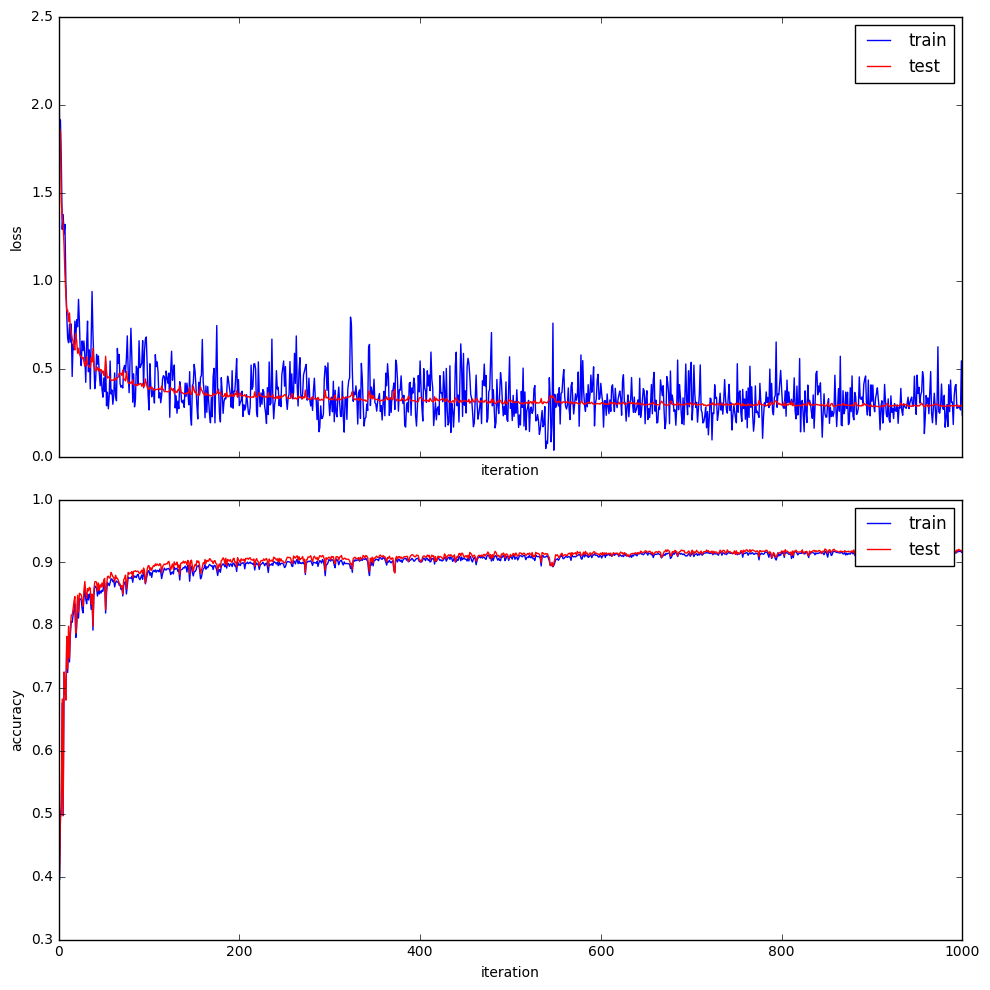

In [19]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(10,10))

ax[0].plot(train_losses, "-b", label="train")
ax[0].plot(test_losses, "-r", label="test")
ax[0].set_xlabel("iteration")
ax[0].set_ylabel("loss")
ax[0].legend()

ax[1].plot(train_accuracy, "-b", label="train")
ax[1].plot(test_accuracy, "-r", label="test")
ax[1].set_xlabel("iteration")
ax[1].set_ylabel("accuracy")
ax[1].legend()

fig.tight_layout()

## Convolutional Neural Networks

In [20]:
sess.close()
sess = tf.InteractiveSession()

In [21]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [22]:
def weight_initialization(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.5))

def bias_initialization(shape):
    return tf.Variable(tf.constant(0.1, shape=shape))

def conv2d(x,W, strides=[1,1,1,1], padding="SAME"):
    return tf.nn.conv2d(x,W,strides=strides, padding=padding)

def max_pool(x, ksize=[1,2,2,1], strides=[1, 2, 2, 1], padding='SAME'):
    return tf.nn.max_pool(x, ksize=ksize, strides=strides, padding=padding)


In [23]:
x_image = tf.reshape(x,[-1,28,28,1])

# 1st Convolution + max pooling
W_conv1 = weight_initialization([5,5,1,32])
b_conv1 = bias_initialization([32])

h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1)+b_conv1)
h_pool1 = max_pool(h_conv1)

# 2nd Convolution + max pooling
W_conv2 = weight_initialization([5,5,32,64])
b_conv2 = bias_initialization([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2)+b_conv2)
h_pool2 = max_pool(h_conv2)

# 1st fully connected
W_fc1 = weight_initialization([7*7*64, 1024])
b_fc1 = bias_initialization([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.matmul(h_pool2_flat, W_fc1) + b_fc1

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# Output
W_fc2 = weight_initialization([1024, 10])
b_fc2 = bias_initialization([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [24]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init_op = tf.initialize_all_variables()

In [25]:
sess.run(init_op)

In [26]:
%%time
train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []
for i in xrange(20001):
    batch = mnist.train.next_batch(30)
    step, loss = sess.run([train_step, cross_entropy], feed_dict={x:batch[0], y_:batch[1], keep_prob: 0.5})
    if i%500 == 0:
        train_losses.append(loss)
        acc = sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels, keep_prob: 1.})
        train_accuracy.append(acc)
        loss, acc = sess.run([cross_entropy, accuracy], feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.})
        test_losses.append(loss)
        test_accuracy.append(acc)
        print "[%s] Loss: %.3f (Train) %.3f (Test); Accuracy: %.3f (Train) %.3f (Test)" % (
            i, train_losses[-1], test_losses[-1], train_accuracy[-1], test_accuracy[-1]
        )

[0] Loss: 6003.296 (Train) 3332.718 (Test); Accuracy: 0.069 (Train) 0.068 (Test)
[500] Loss: 994.452 (Train) 176.436 (Test); Accuracy: 0.830 (Train) 0.838 (Test)
[1000] Loss: 482.056 (Train) 108.567 (Test); Accuracy: 0.892 (Train) 0.895 (Test)
[1500] Loss: 213.429 (Train) 84.391 (Test); Accuracy: 0.914 (Train) 0.918 (Test)
[2000] Loss: 133.585 (Train) 63.973 (Test); Accuracy: 0.928 (Train) 0.932 (Test)
[2500] Loss: 100.598 (Train) 52.511 (Test); Accuracy: 0.939 (Train) 0.942 (Test)
[3000] Loss: 89.603 (Train) 45.546 (Test); Accuracy: 0.946 (Train) 0.949 (Test)
[3500] Loss: 166.897 (Train) 37.380 (Test); Accuracy: 0.950 (Train) 0.953 (Test)
[4000] Loss: 267.383 (Train) 34.193 (Test); Accuracy: 0.954 (Train) 0.957 (Test)
[4500] Loss: 22.952 (Train) 29.031 (Test); Accuracy: 0.958 (Train) 0.962 (Test)
[5000] Loss: 33.288 (Train) 26.472 (Test); Accuracy: 0.961 (Train) 0.964 (Test)
[5500] Loss: 10.301 (Train) 23.691 (Test); Accuracy: 0.965 (Train) 0.967 (Test)
[6000] Loss: 45.359 (Train) 20.

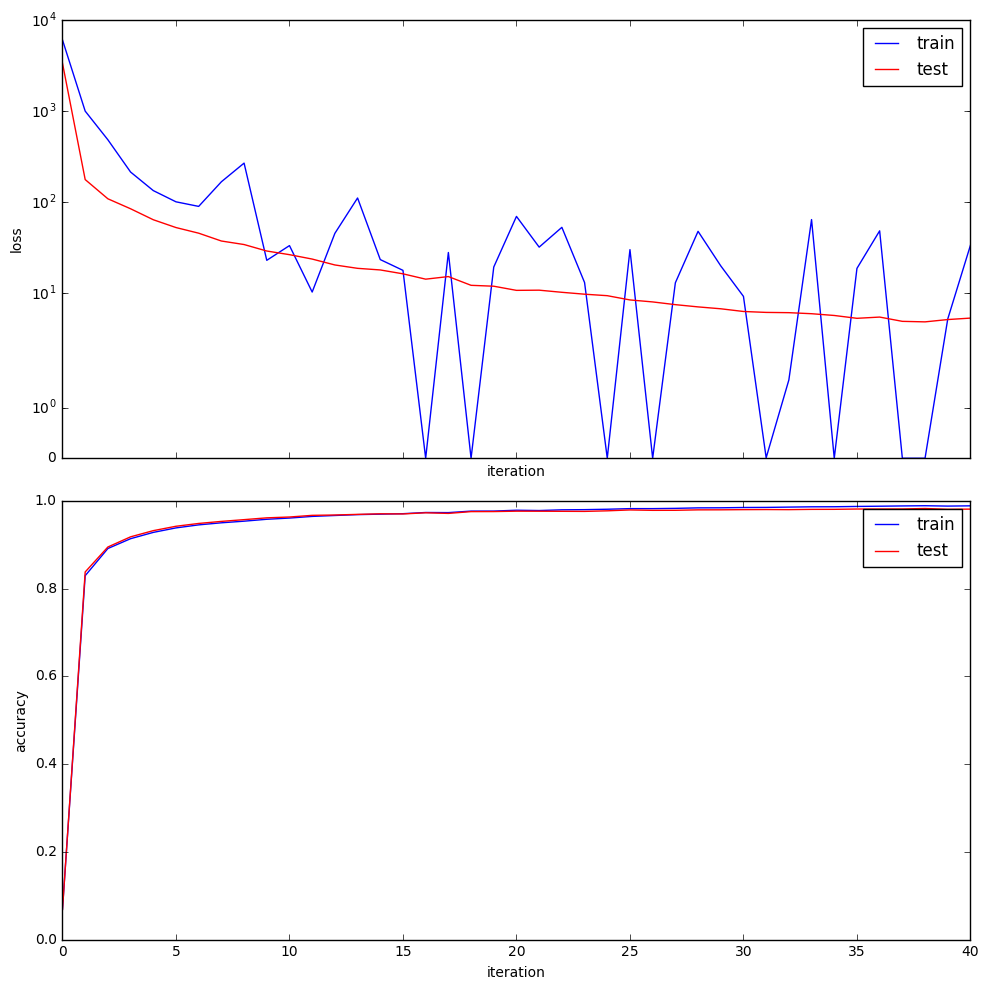

In [29]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(10,10))

ax[0].plot(train_losses, "-b", label="train")
ax[0].plot(test_losses, "-r", label="test")
ax[0].set_xlabel("iteration")
ax[0].set_ylabel("loss")
ax[0].set_yscale("symlog")
ax[0].legend()

ax[1].plot(train_accuracy, "-b", label="train")
ax[1].plot(test_accuracy, "-r", label="test")
ax[1].set_xlabel("iteration")
ax[1].set_ylabel("accuracy")
ax[1].legend()

fig.tight_layout()   

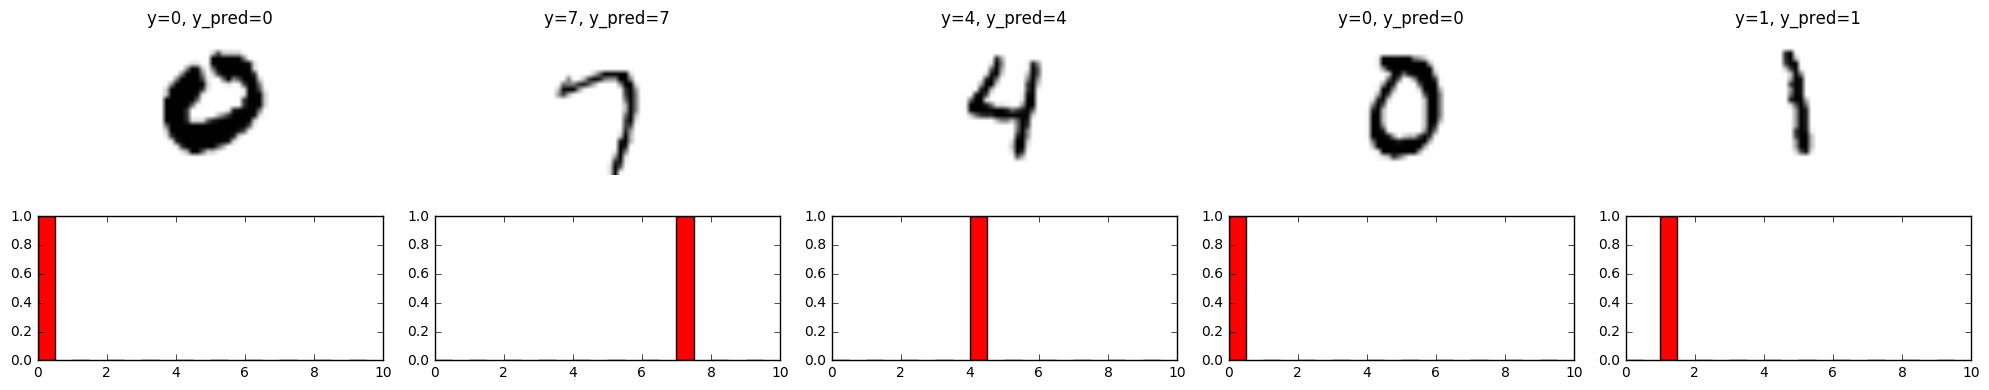

In [53]:
batch = mnist.test.next_batch(5)
x_img_true, y_conv_pred = sess.run([x_image, y_conv], feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.})

def plot_digit(x,y,y_pred,ax, axhist=None):
    x = np.reshape(x, (28,28))
    ax.imshow(x, cmap="Greys")
    ax.set_title("y=%s, y_pred=%s" % (np.argmax(y), np.argmax(y_pred)))
    ax.axis('off')
    if axhist is not None:
        y_pred = sess.run(tf.nn.softmax(y_pred))
        #axhist.plot(y_pred, "-bo")
        axhist.bar(np.arange(10), y_pred, 0.5, color='r')
    
fig, ax = plt.subplots(2,5, figsize=(20,4))
for xx, yy, yy_pred, axi, axihist in zip(x_img_true, batch[1],
                                y_conv_pred, ax[0], ax[1]):
    plot_digit(xx,yy,yy_pred,axi, axihist)
fig.tight_layout()